In [7]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
from ipywidgets import IntProgress

from code.bp import *
from code.lattice import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Inference: Belief Propagation

In [17]:
fprefix = 'bp_gaussian'

h, w = 50, 50

J = 0.5
B = np.zeros((h, w)) #0.01 * gaussian_B(h, w)
beta = 0

In [18]:
unary_potentials = np.exp(beta * np.expand_dims(B, axis=-1) * np.tile(np.array([-1, 1]), (h, w, 1)))
pairwise_potential = np.exp(beta * J * np.outer([-1, 1], [-1, 1]))

unary_messages = np.ones((h, w, 4, 2)) # U, D, L, R
col_pairwise_messages = np.ones((h-1, w, 2, 2)) # U, D
row_pairwise_messages = np.ones((h, w-1, 2, 2)) # L, R

In [19]:
timesteps = [normalize_beliefs(compute_unary_beliefs(h, w, unary_potentials, unary_messages))]

delta = 1
while delta > 1e-3:
    
    # Old messages
    unary_copy = unary_messages.copy()
    col_pairwise_copy = col_pairwise_messages.copy()
    row_pairwise_copy = row_pairwise_messages.copy()
    
    # Step
    step(h, w, unary_potentials, pairwise_potential, unary_messages, col_pairwise_messages, row_pairwise_messages)
    
    # Compute message differences
    d_unary = np.max(np.abs(unary_copy - unary_messages))
    d_col_pairwise = np.max(np.abs(col_pairwise_copy - col_pairwise_messages))
    d_row_pairwise = np.max(np.abs(row_pairwise_copy - row_pairwise_messages))
    
    delta = max(d_unary, d_col_pairwise, d_row_pairwise)
    print('.', end='')
    
    # Log beliefs
    timesteps.append(normalize_beliefs(compute_unary_beliefs(h, w, unary_potentials, unary_messages)))

..

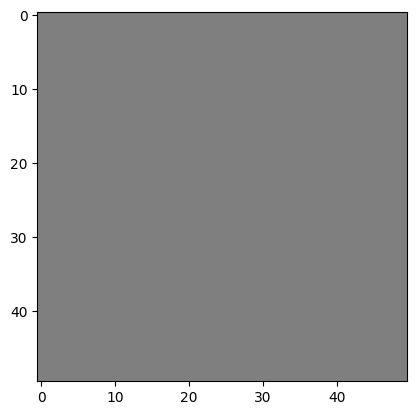

In [20]:
plt.imshow(timesteps[-1], 'binary', vmin=0, vmax=1)

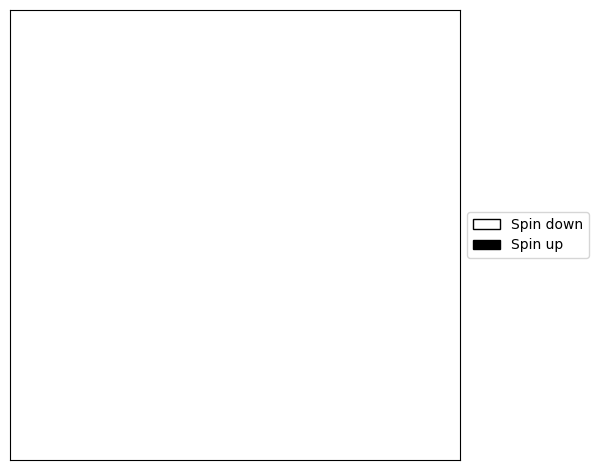

In [10]:
render_timesteps(timesteps, 16, 32, 'graphics/' + fprefix + '.mp4')